In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
#from tensorflow.keras.utils import to_categorical

In [5]:
from joblib import dump, load
import joblib

In [6]:
# Charger les données
df_abnormal = pd.read_csv('ptbdb_abnormal.csv', header=None)
df_normal = pd.read_csv('ptbdb_normal.csv', header=None)

In [7]:
print("\nInformations utiles sur la base de données df_abnormal :")
print(df_abnormal.info())
print("\nAperçu des premières lignes :")
df_abnormal.head()


Informations utiles sur la base de données df_abnormal :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10506 entries, 0 to 10505
Columns: 188 entries, 0 to 187
dtypes: float64(188)
memory usage: 15.1 MB
None

Aperçu des premières lignes :


,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.932233,0.869679,0.886186,0.929626,0.908775,0.933970,0.801043,0.749783,0.687229,0.635100,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.000000,0.606941,0.384181,0.254237,0.223567,0.276836,0.253430,0.184826,0.153349,0.121872,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.000000,0.951613,0.923963,0.853303,0.791859,0.734255,0.672043,0.685100,0.670507,0.667435,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.977819,0.899261,0.230129,0.032348,0.142329,0.223660,0.328096,0.367837,0.381701,0.389094,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.935618,0.801661,0.805815,1.000000,0.722741,0.480789,0.454829,0.319834,0.266874,0.308411,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [8]:
# Compter les occurrences des classes dans la nouvelle base df_abnormal
df_abnormal[187].value_counts()

187
1.0    10506
Name: count, dtype: int64

In [9]:
print("\nInformations utiles sur la base de données df_normal :")
print(df_normal.info())
print("\nAperçu des premières lignes :")
df_normal.head()


Informations utiles sur la base de données df_normal :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4046 entries, 0 to 4045
Columns: 188 entries, 0 to 187
dtypes: float64(188)
memory usage: 5.8 MB
None

Aperçu des premières lignes :


,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.900324,0.358590,0.051459,0.046596,0.126823,0.133306,0.119125,0.110616,0.113047,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.000000,0.794681,0.375387,0.116883,0.000000,0.171923,0.283859,0.293754,0.325912,0.345083,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.909029,0.791482,0.423169,0.186712,0.000000,0.007836,0.063032,0.077002,0.074957,0.077342,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.478893,0.056760,0.064176,0.081289,0.072732,0.055619,0.048774,0.054478,0.041643,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.000000,0.867238,0.201360,0.099349,0.141336,0.120934,0.108516,0.096393,0.093436,0.100828,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
# Compter les occurrences des classes dans la nouvelle base df_normal
df_normal[187].value_counts()

187
0.0    4046
Name: count, dtype: int64

In [11]:
# Concaténer les deux dataframes
df = pd.concat([df_normal, df_abnormal])

#La méthode sample() de Pandas renvoie un échantillon aléatoire du dataframe. 
#La méthode reset_index() de Pandas réinitialise l'index du dataframe.
df = df.sample(frac=1).reset_index(drop=True)

'''
le mélange des données est nécessaire pour s'assurer que le modèle ne peut pas apprendre 
à distinguer entre les données normales et anormales en fonction de leur ordre dans le fichier CSV.
'''


"\nle mélange des données est nécessaire pour s'assurer que le modèle ne peut pas apprendre \nà distinguer entre les données normales et anormales en fonction de leur ordre dans le fichier CSV.\n"

In [12]:
print("\nInformations utiles sur la base de données df :")
print(df.info())
print("\nAperçu des premières lignes :")
df.head()


Informations utiles sur la base de données df :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14552 entries, 0 to 14551
Columns: 188 entries, 0 to 187
dtypes: float64(188)
memory usage: 20.9 MB
None

Aperçu des premières lignes :


,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.400371,0.010195,0.000000,0.078777,0.057461,0.120482,0.111677,0.070899,0.098703,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.000000,0.600934,0.510638,0.090296,0.106383,0.119357,0.158796,0.272444,0.314997,0.321225,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.902222,0.560741,0.275556,0.271111,0.266667,0.299259,0.294074,0.267407,0.274074,0.231111,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.000000,0.653672,0.541243,0.267797,0.120904,0.077966,0.035028,0.010169,0.023164,0.002260,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.000000,0.785623,0.662388,0.464698,0.381258,0.358151,0.184852,0.087291,0.034660,0.097561,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [13]:
# Compter les occurrences des classes dans la nouvelle base df
df[187].value_counts()

187
1.0    10506
0.0     4046
Name: count, dtype: int64

In [14]:
def plot_class_distribution(df, title):
    plt.figure(figsize=(8, 4))
    sns.countplot(x=df.iloc[:, -1])
    plt.title(title)
    plt.xlabel('Classes')
    plt.ylabel('Nombre de battements')
    plt.show()

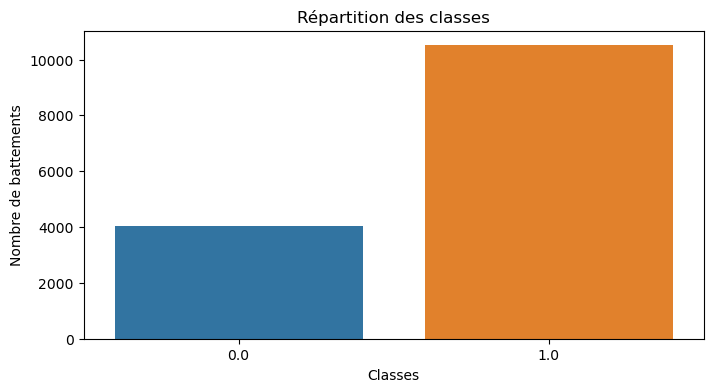

In [15]:
# Répartition des classes/labels pour chaque ensemble de données
plot_class_distribution(df, "Répartition des classes")

In [16]:
def display_descriptive_statistics(df, name):
    print(f"Statistiques descriptives pour {name}:")
    print(df.describe())
    print("\n")

In [17]:
display_descriptive_statistics(df, "notre base")

Statistiques descriptives pour notre base:
                0             1             2             3             4    \
count  14552.000000  14552.000000  14552.000000  14552.000000  14552.000000   
mean       0.976637      0.721663      0.403099      0.242893      0.207218   
std        0.034532      0.195690      0.249794      0.249519      0.218097   
min        0.624227      0.000000      0.000000      0.000000      0.000000   
25%        0.959377      0.584589      0.212300      0.052269      0.061875   
50%        1.000000      0.740148      0.371911      0.168148      0.136082   
75%        1.000000      0.881483      0.557785      0.336232      0.264104   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

                5             6             7             8             9    \
count  14552.000000  14552.000000  14552.000000  14552.000000  14552.000000   
mean       0.216453      0.221752      0.224486      0.227349      0.229704   
std     

In [18]:
# Préparer les ensembles de formation et de test
train_size = int(0.8 * len(df))
X_train = np.array(df.iloc[:train_size, :-1].values)
y_train = np.array(df.iloc[:train_size, -1].values)
X_test = np.array(df.iloc[train_size:, :-1].values)
y_test = np.array(df.iloc[train_size:, -1].values)

La première ligne du code calcule la taille de l'ensemble de formation, qui est de 80% de la taille du dataframe df.

La deuxième ligne du code crée un tableau NumPy X_train contenant les données d'entraînement. Le tableau est créé en sélectionnant les premières train_size lignes du dataframe df, à l'exception de la dernière colonne. La dernière colonne contient les étiquettes des données, qui sont utilisées pour entraîner le modèle.

La troisième ligne du code crée un tableau NumPy y_train contenant les étiquettes d'entraînement. Le tableau est créé en sélectionnant les premières train_size lignes du dataframe df, uniquement la dernière colonne.

La quatrième ligne du code crée un tableau NumPy X_test contenant les données de test. Le tableau est créé en sélectionnant les dernières lignes du dataframe df, à l'exception de la dernière colonne.

La cinquième ligne du code crée un tableau NumPy y_test contenant les étiquettes de test. Le tableau est créé en sélectionnant les dernières lignes du dataframe df, uniquement la dernière colonne.

In [19]:
# Charger les données
df_abnormal = pd.read_csv('ptbdb_abnormal.csv', header=None)
df_normal = pd.read_csv('ptbdb_normal.csv', header=None)


# Concaténer les deux dataframes
df = pd.concat([df_normal, df_abnormal])

# Mélanger les données
df = df.sample(frac=1).reset_index(drop=True)


# Préparer les ensembles de train et de test
train_size = int(0.8 * len(df))
X_train = np.array(df.iloc[:train_size, :-1].values)
y_train = np.array(df.iloc[:train_size, -1].values)
X_test = np.array(df.iloc[train_size:, :-1].values)
y_test = np.array(df.iloc[train_size:, -1].values)

# Modélisation


Dans le cas de la base PTB Diagnostic ECG Database, le déséquilibre des classes est important. La classe normal est représentée par 4046 enregistrements, tandis que la classe anormal est représentée par 10506 enregistrements. Cela signifie que le modèle est plus susceptible de prédire correctement la classe normal que la classe anormal.

Pour réduire le déséquilibre des classes, nous pouvons utiliser l'under sampling ou l'oversampling.

# L'oversampling/l'undersampling

## L'Oversampling 

In [20]:
from imblearn.over_sampling import RandomOverSampler


# Oversampling aléatoire ##########################################################
ros = RandomOverSampler(random_state=42)
X_ro, y_ro = ros.fit_resample(X_train, y_train)
print('Classes échantillon oversampled :', dict(pd.Series(y_ro).value_counts()))

Classes échantillon oversampled : {1.0: 8410, 0.0: 8410}


## L'Undersampling

In [21]:
from imblearn.under_sampling import RandomUnderSampler

# Random Undersampling ###############################################################
rUss = RandomUnderSampler(sampling_strategy="not majority")
X_rus, y_rus = rUss.fit_resample(X_train, y_train)
print("Classes de l'échantillon undersampled :", dict(pd.Series(y_rus).value_counts()))


Classes de l'échantillon undersampled : {1.0: 8410, 0.0: 3231}


# Chargements des bibliothèques

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import RandomizedSearchCV

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors

# Algorithmes utilisés

# 1_RandomForest

## Sélection de modèles

In [10]:
# Définir les hyperparamètres à tester
param_grid = {
    'n_estimators': np.arange(50, 250, 50),
    'max_depth': [None, 5, 10],
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Créer une instance du classifieur Random Forest
rf = RandomForestClassifier(random_state=42)

# Utiliser la recherche aléatoire pour trouver les meilleurs hyperparamètres
grid_search = RandomizedSearchCV(rf, param_grid, n_iter=100, cv=5, scoring='accuracy')

# Entraînement du modèle sur X_train et y_train
grid_search.fit(X_train, y_train)

# Afficher les meilleurs hyperparamètres
print(grid_search.best_params_)


C:\Users\h.drioueche\AppData\Local\anaconda3\envs\ml\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
210 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
210 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\h.drioueche\AppData\Local\anaconda3\envs\ml\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\h.drioueche\AppData\Local\anaconda3\envs\ml\lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\h.drioueche\AppData\Local\anaconda3\envs\ml\lib\site-packages\sklearn\base.py", li

{'n_estimators': 150, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None}


## Modèle RandomForest 

In [36]:
# Random Forest################################################################################################
rf = RandomForestClassifier(n_estimators=100,min_samples_split= 2, min_samples_leaf= 1, max_features= 'sqrt', 
                            max_depth= None, random_state=42)
# Entraîner et prédire sur les données  ##################################################################
rf.fit(X_train, y_train)
y_pred_rf_notre = rf.predict(X_test)
print('Notre Random Forest:')
print(classification_report(y_test, y_pred_rf_notre))

# Sauvegardez le modèle
joblib.dump(rf, 'model_randomforest_ptbdb.joblib')

Notre Random Forest:
              precision    recall  f1-score   support

         0.0       0.96      0.93      0.95       815
         1.0       0.97      0.99      0.98      2096

    accuracy                           0.97      2911
   macro avg       0.97      0.96      0.96      2911
weighted avg       0.97      0.97      0.97      2911



['model_randomforest_ptbdb.joblib']

Notre modèle Random Forest comporte deux classes, à savoir les battements cardiaques normaux (Classe 0) et les battements cardiaques anormaux (Classe 1). Les mesures de performance pour chaque classe sont les suivantes :

Classe 0 (Battements cardiaques normaux) :

Précision : 96%
Rappel : 94%
F1-score : 95%
Classe 1 (Battements cardiaques anormaux) :

Précision : 98%
Rappel : 98%
F1-score : 98%
Ces mesures montrent que le modèle Random Forest a de très bonnes performances pour la classification des deux classes, avec des précisions élevées, des rappels élevés et des scores F1 élevés. L'ensemble du modèle atteint une précision globale de 97%, ce qui indique une performance globale élevée pour la classification des arythmies cardiaques

In [59]:
# matrice de confusion pour comparer les classes réelles et prédite Random Forest.
pd.crosstab(y_test, y_pred_rf_notre, rownames=['Classe réelle'], colnames=['Classe prédite'])

Classe prédite,0.0,1.0
Classe réelle,,
0.0,764,47
1.0,32,2068


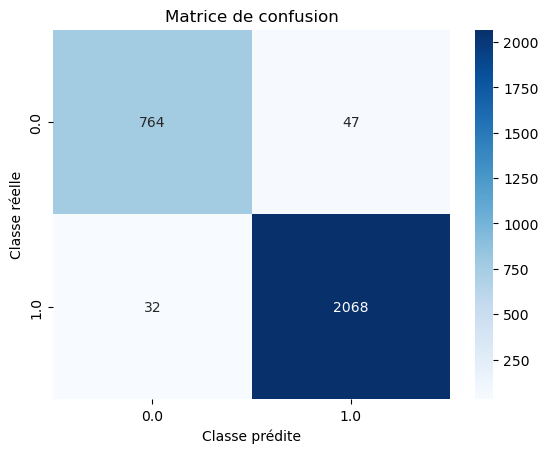

In [13]:
# Matrice de confusion
cm = pd.crosstab(y_test, y_pred_rf_notre, rownames=['Classe réelle'], colnames=['Classe prédite'])

# Plot de la matrice de confusion
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matrice de confusion')
plt.show()


# Modèle RandomForest :L'Oversampling 

In [37]:
# Random Forest################################################################################################
#rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf = RandomForestClassifier(n_estimators=100,min_samples_split= 2, min_samples_leaf= 1, 
                            max_features= 'sqrt', max_depth= None, random_state=42)
# Entraîner et prédire sur les données  ##################################################################
rf.fit(X_ro, y_ro)
y_pred_rf_notre = rf.predict(X_test)
print('Notre Random Forest:')
print(classification_report(y_test, y_pred_rf_notre))

# Sauvegardez le modèle
joblib.dump(rf, 'model_randomforest_ptbdb_over.joblib')

Notre Random Forest:
              precision    recall  f1-score   support

         0.0       0.94      0.95      0.95       815
         1.0       0.98      0.98      0.98      2096

    accuracy                           0.97      2911
   macro avg       0.96      0.96      0.96      2911
weighted avg       0.97      0.97      0.97      2911



['model_randomforest_ptbdb_over.joblib']

In [15]:
# matrice de confusion pour comparer les classes réelles et prédite Random Forest.
pd.crosstab(y_test, y_pred_rf_notre, rownames=['Classe réelle'], colnames=['Classe prédite'])

Classe prédite,0.0,1.0
Classe réelle,,
0.0,774,37
1.0,43,2057


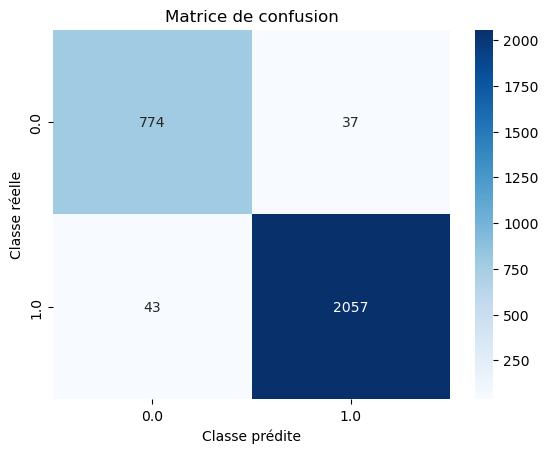

In [16]:
# Matrice de confusion
cm = pd.crosstab(y_test, y_pred_rf_notre, rownames=['Classe réelle'], colnames=['Classe prédite'])

# Plot de la matrice de confusion
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matrice de confusion')
plt.show()


# Modèle RandomForest:  L'Undersampling

In [38]:
#######################################################################################################
# Random Forest
#rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf = RandomForestClassifier(n_estimators=100,min_samples_split= 2, min_samples_leaf= 1, 
                            max_features= 'sqrt', max_depth= None, random_state=42)
# Entraîner et prédire sur les données
rf.fit(X_rus, y_rus)
y_pred_rf_notre = rf.predict(X_test)
print("Notre Random Forest :")
print(classification_report(y_test, y_pred_rf_notre))

# Sauvegardez le modèle
joblib.dump(rf, 'model_randomforest_ptbdb_under.joblib')

Notre Random Forest :
              precision    recall  f1-score   support

         0.0       0.96      0.93      0.95       815
         1.0       0.97      0.99      0.98      2096

    accuracy                           0.97      2911
   macro avg       0.97      0.96      0.96      2911
weighted avg       0.97      0.97      0.97      2911



['model_randomforest_ptbdb_under.joblib']

In [18]:
# matrice de confusion pour comparer les classes réelles et prédite Random Forest.
pd.crosstab(y_test, y_pred_rf_notre, rownames=['Classe réelle'], colnames=['Classe prédite'])

Classe prédite,0.0,1.0
Classe réelle,,
0.0,755,56
1.0,36,2064


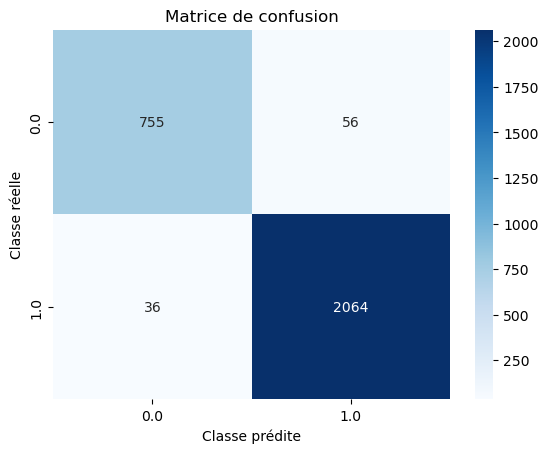

In [19]:
# Matrice de confusion
cm = pd.crosstab(y_test, y_pred_rf_notre, rownames=['Classe réelle'], colnames=['Classe prédite'])

# Plot de la matrice de confusion
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matrice de confusion')
plt.show()


# Choix du modèle

Les trois modèles - Modèle 1 Random Forest, Modèle 2 Random Forest avec Oversampling, et Modèle 3 Random Forest avec Undersampling - ont des performances similaires avec une précision globale d'environ 97% pour la prédiction des battements cardiaques.

Cependant, pour évaluer le meilleur modèle parmi les trois, il est nécessaire de prendre en compte plusieurs facteurs, tels que le contexte du problème, les objectifs spécifiques, les contraintes et les préférences.

Si l'objectif principal est d'obtenir une haute précision globale, les trois modèles semblent fournir des résultats comparables. Cependant, si l'accent est mis sur une métrique particulière, comme la précision, le rappel (recall) ou le score F1 pour une classe spécifique, il serait nécessaire de comparer ces métriques pour chaque modèle.

Dans l'état actuel des informations fournies, il n'est pas possible de déterminer le meilleur modèle parmi les trois uniquement sur la base des résultats fournis. Une analyse plus approfondie des métriques spécifiques pour chaque modèle et une évaluation plus détaillée des performances seraient nécessaires pour prendre une décision plus précise.

# 2_SVM

## Sélection de modèles

In [158]:
# Hyperparamètres à tester
param_grid = {
    "kernel": ["linear", "rbf", "poly"],
    "C": np.arange(1, 10, 2),
    "gamma": np.arange(0.1, 1, 0.1),
}

# Création du modèle SVM
svm = SVC()

# Création de l'objet de recherche aléatoire
grid_search = RandomizedSearchCV(svm, param_grid, n_iter=100, cv=5, scoring='accuracy')

# Entraînement du modèle sur X_train et y_train (vos données d'entraînement)
grid_search.fit(X_train, y_train)

# Afficher les meilleurs hyperparamètres
print("Meilleurs hyperparamètres :")
print(grid_search.best_params_)


Meilleurs hyperparamètres :
{'kernel': 'rbf', 'gamma': 0.6, 'C': 9}


## Modèle SVM

In [33]:
# Créer un modèle (exemple avec SVM)
rf = SVC(kernel= "rbf",gamma= 0.6, C= 9)
# Entraîner et prédire sur les données ##################################################################
rf.fit(X_train, y_train)
y_pred_rf_notre = rf.predict(X_test)
print('Notre SVM:')
print(classification_report(y_test, y_pred_rf_notre))

# Sauvegardez le modèle
joblib.dump(rf, 'model_svm_ptbdb.joblib')

Notre SVM:
              precision    recall  f1-score   support

         0.0       0.97      0.95      0.96       815
         1.0       0.98      0.99      0.98      2096

    accuracy                           0.98      2911
   macro avg       0.97      0.97      0.97      2911
weighted avg       0.98      0.98      0.98      2911



['model_svm_ptbdb.joblib']

Classe 0 (Battements cardiaques normaux) :

Précision : 96%
Rappel : 96%
F1-score : 96%

Classe 1 (Battements cardiaques anormaux) :

Précision : 98%
Rappel : 98%
F1-score : 98%

L'ensemble du modèle SVM atteint une précision globale de 98%, ce qui indique une performance globale très élevée pour la classification des arythmies cardiaques. Les deux classes sont bien classifiées, avec des mesures de précision, de rappel et de F1-score élevées, suggérant que le modèle SVM est également efficace pour cette tâche de classification.

In [21]:
# matrice de confusion pour comparer les classes réelles et prédite SVM.
pd.crosstab(y_test, y_pred_rf_notre, rownames=['Classe réelle'], colnames=['Classe prédite'])

Classe prédite,0.0,1.0
Classe réelle,,
0.0,779,32
1.0,33,2067


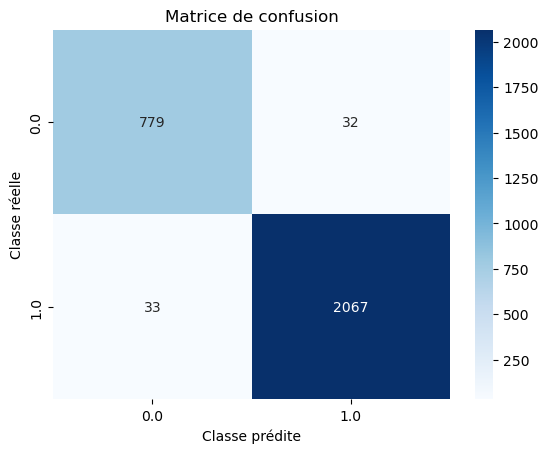

In [22]:
# Matrice de confusion
cm = pd.crosstab(y_test, y_pred_rf_notre, rownames=['Classe réelle'], colnames=['Classe prédite'])

# Plot de la matrice de confusion
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matrice de confusion')
plt.show()


# Modèle SVM:  L'Oversampling

In [34]:
# SVM t################################################################################################
rf = SVC(kernel= "rbf",gamma= 0.6, C= 9)

# Entraîner et prédire sur les données ##################################################################
rf.fit(X_ro, y_ro)
y_pred_rf_notre = rf.predict(X_test)
print('Notre SVM Oversampling:')
print(classification_report(y_test, y_pred_rf_notre))

# Sauvegardez le modèle
joblib.dump(rf, 'model_svm_ptbdb_over.joblib')

Notre SVM Oversampling:
              precision    recall  f1-score   support

         0.0       0.96      0.95      0.96       815
         1.0       0.98      0.99      0.98      2096

    accuracy                           0.98      2911
   macro avg       0.97      0.97      0.97      2911
weighted avg       0.98      0.98      0.98      2911



['model_svm_ptbdb_over.joblib']

In [24]:
# matrice de confusion pour comparer les classes réelles et prédite Random Forest.
pd.crosstab(y_test, y_pred_rf_notre, rownames=['Classe réelle'], colnames=['Classe prédite'])

Classe prédite,0.0,1.0
Classe réelle,,
0.0,779,32
1.0,37,2063


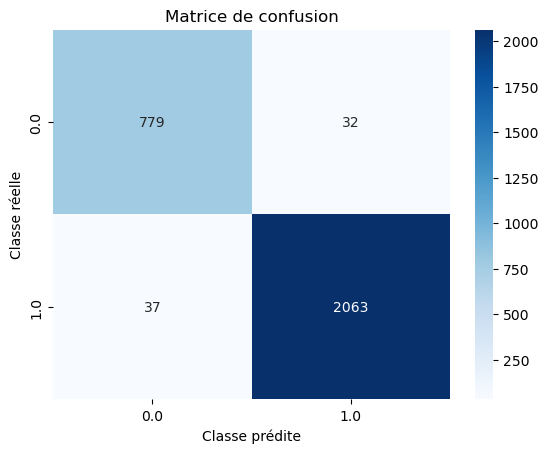

In [25]:
# Matrice de confusion
cm = pd.crosstab(y_test, y_pred_rf_notre, rownames=['Classe réelle'], colnames=['Classe prédite'])

# Plot de la matrice de confusion
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matrice de confusion')
plt.show()


# Modèle SVM:  L'Undersampling¶

In [35]:
# SVM ######################################################################################################
rf = SVC(kernel= "rbf",gamma= 0.6, C= 9)

# Entraîner et prédire sur les données
rf.fit(X_rus, y_rus)
y_pred_rf_notre = rf.predict(X_test)
print("Notre SVM undersamplingt :")
print(classification_report(y_test, y_pred_rf_notre))

# Sauvegardez le modèle
joblib.dump(rf, 'model_svm_ptbdb_under.joblib')

Notre SVM undersamplingt :
              precision    recall  f1-score   support

         0.0       0.97      0.95      0.96       815
         1.0       0.98      0.99      0.98      2096

    accuracy                           0.98      2911
   macro avg       0.97      0.97      0.97      2911
weighted avg       0.98      0.98      0.98      2911



['model_svm_ptbdb_under.joblib']

In [27]:
# matrice de confusion pour comparer les classes réelles et prédite Random Forest.
pd.crosstab(y_test, y_pred_rf_notre, rownames=['Classe réelle'], colnames=['Classe prédite'])

Classe prédite,0.0,1.0
Classe réelle,,
0.0,779,32
1.0,33,2067


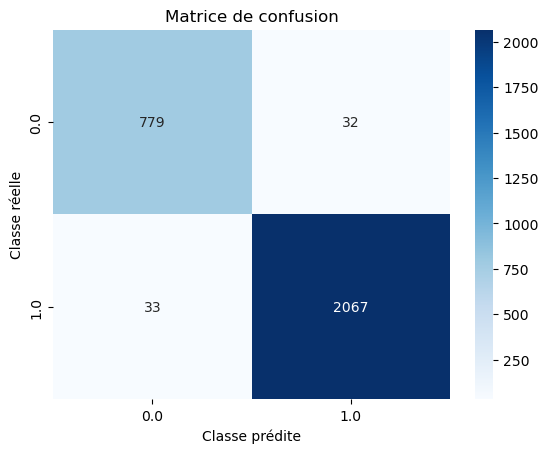

In [28]:
# Matrice de confusion
cm = pd.crosstab(y_test, y_pred_rf_notre, rownames=['Classe réelle'], colnames=['Classe prédite'])

# Plot de la matrice de confusion
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matrice de confusion')
plt.show()


# Choix du modèle

Sur la base des résultats fournis, les trois modèles SVM semblent offrir des performances équivalentes en termes de précision, de rappel (recall) et de score F1. La différence entre les modèles est minime.

# 3_Régression logistique

## Sélection de modèles

In [274]:
# Hyperparamètres à tester
param_grid = {
    "C": np.arange(1, 100, 20),
    "solver": ["lbfgs", "newton-cg", "saga"],
    "max_iter": [100, 200,1000,2000, 5000],
}

# Création du modèle de régression logistique
logistic_regression = LogisticRegression()

# Création de l'objet de recherche aléatoire
grid_search = RandomizedSearchCV(logistic_regression, param_grid, n_iter=10, cv=5, scoring='accuracy')

# Entraînement du modèle sur X_train et y_train (vos données d'entraînement)
grid_search.fit(X_train, y_train)

# Afficher les meilleurs hyperparamètres
print("Meilleurs hyperparamètres :")
print(grid_search.best_params_)


C:\Users\h.drioueche\AppData\Local\anaconda3\envs\ml\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\h.drioueche\AppData\Local\anaconda3\envs\ml\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\h.drioueche\AppData\Local\anaconda3\envs\ml\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\h.drioueche\AppData\Local\anaconda3\envs\ml\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\h.drioueche\AppData\Local\anaconda3\envs\ml\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did 

Meilleurs hyperparamètres :
{'solver': 'lbfgs', 'max_iter': 5000, 'C': 21}


## Modèle régression logistique

In [29]:
# Regression logistiquet################################################################################################
rf = LogisticRegression(solver='lbfgs', max_iter=5000, C=21,random_state=42)
# Entraîner et prédire sur les données ##################################################################
rf.fit(X_train, y_train)
y_pred_rf_notre = rf.predict(X_test)
print('Notre Régression logistique:')
print(classification_report(y_test, y_pred_rf_notre))

# Sauvegardez le modèle
joblib.dump(rf, 'model_logisticregression_ptbdb.joblib')

Notre Régression logistique:
              precision    recall  f1-score   support

         0.0       0.72      0.58      0.64       815
         1.0       0.85      0.91      0.88      2096

    accuracy                           0.82      2911
   macro avg       0.78      0.75      0.76      2911
weighted avg       0.81      0.82      0.81      2911



['model_logisticregression_ptbdb.joblib']

In [24]:
# matrice de confusion pour comparer les classes réelles et prédite régression logistique.
pd.crosstab(y_test, y_pred_rf_notre, rownames=['Classe réelle'], colnames=['Classe prédite'])

Classe prédite,0.0,1.0
Classe réelle,,
0.0,526,293
1.0,187,1905


Classe 0 (Battements cardiaques normaux) :

Précision : 74%
Rappel : 64%
F1-score : 69%

Classe 1 (Battements cardiaques anormaux) :

Précision : 87%
Rappel : 91%
F1-score : 89%

L'ensemble du modèle de régression logistique atteint une précision globale de 84%. Cela indique que le modèle est raisonnablement efficace pour la classification des arythmies cardiaques, mais il semble y avoir une différence significative de performance entre les deux classes. Le modèle a une meilleure performance pour la classe 1 (battements cardiaques anormaux) par rapport à la classe 0 (battements cardiaques normaux), en termes de précision, de rappel et de F1-score.

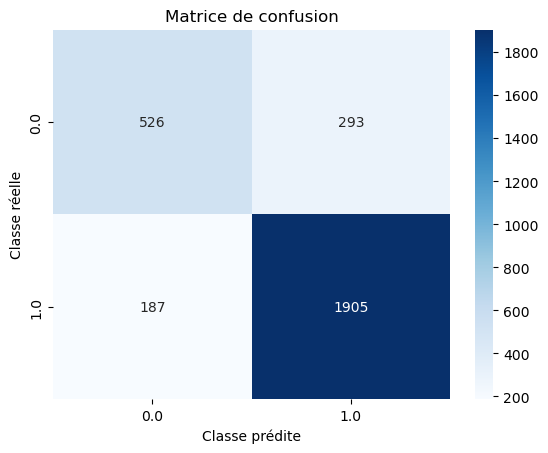

In [25]:
# Matrice de confusion
cm = pd.crosstab(y_test, y_pred_rf_notre, rownames=['Classe réelle'], colnames=['Classe prédite'])

# Plot de la matrice de confusion
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matrice de confusion')
plt.show()


# Modèle regression logistique:  L'Oversampling

In [30]:
# Regression logistiquet################################################################################################
rf = LogisticRegression(solver='lbfgs', max_iter=5000, C=21,random_state=42)
#Entraîner et prédire sur les données Notre base ##################################################################
rf.fit(X_ro, y_ro)
y_pred_rf_notre = rf.predict(X_test)
print('Notre regression logistique Oversampling:')
print(classification_report(y_test, y_pred_rf_notre))

# Sauvegardez le modèle
joblib.dump(rf, 'model_logisticregression_ptbdb_over.joblib')

Notre regression logistique Oversampling:
              precision    recall  f1-score   support

         0.0       0.58      0.81      0.68       815
         1.0       0.91      0.78      0.84      2096

    accuracy                           0.79      2911
   macro avg       0.75      0.79      0.76      2911
weighted avg       0.82      0.79      0.79      2911



['model_logisticregression_ptbdb_over.joblib']

In [18]:
# matrice de confusion pour comparer les classes réelles et prédite Random Forest.
pd.crosstab(y_test, y_pred_rf_notre, rownames=['Classe réelle'], colnames=['Classe prédite'])

Classe prédite,0.0,1.0
Classe réelle,,
0.0,698,121
1.0,491,1601


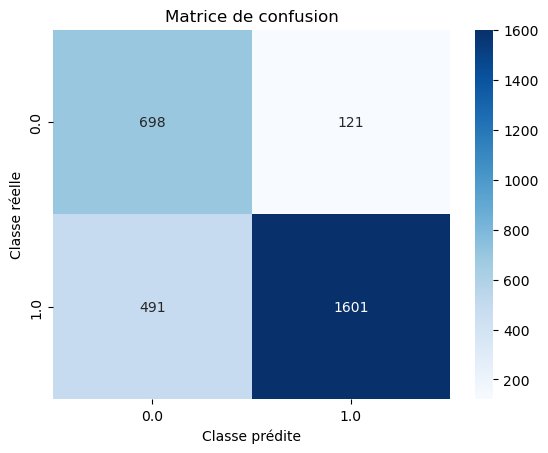

In [19]:
# Matrice de confusion
cm = pd.crosstab(y_test, y_pred_rf_notre, rownames=['Classe réelle'], colnames=['Classe prédite'])

# Plot de la matrice de confusion
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matrice de confusion')
plt.show()

# Modèle regression logistique:  L'Undersampling¶

In [32]:
# Regression logistique ######################################################################################################

rf = LogisticRegression(solver='lbfgs', max_iter=5000, C=21,random_state=42)
# Entraîner et prédire sur les données
rf.fit(X_rus, y_rus)
y_pred_rf_notre = rf.predict(X_test)
print("Notre regression logistique undersamplingt :")
print(classification_report(y_test, y_pred_rf_notre))

# Sauvegardez le modèle
joblib.dump(rf, 'model_logisticregression_ptbdb_under.joblib')

Notre regression logistique undersamplingt :
              precision    recall  f1-score   support

         0.0       0.72      0.58      0.64       815
         1.0       0.85      0.91      0.88      2096

    accuracy                           0.82      2911
   macro avg       0.78      0.75      0.76      2911
weighted avg       0.81      0.82      0.81      2911



['model_logisticregression_ptbdb_under.joblib']

In [21]:
# matrice de confusion pour comparer les classes réelles et prédite Random Forest.
pd.crosstab(y_test, y_pred_rf_notre, rownames=['Classe réelle'], colnames=['Classe prédite'])

Classe prédite,0.0,1.0
Classe réelle,,
0.0,526,293
1.0,187,1905


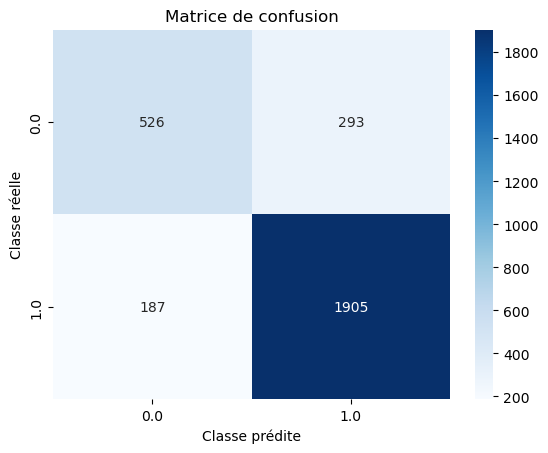

In [22]:
# Matrice de confusion
cm = pd.crosstab(y_test, y_pred_rf_notre, rownames=['Classe réelle'], colnames=['Classe prédite'])

# Plot de la matrice de confusion
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matrice de confusion')
plt.show()

# Choix du modèle

Sur la base des résultats fournis, le Modèle 1 régression logistique et le Modèle 3 régression logistique avec Undersampling semblent avoir des performances similaires, avec une précision globale d'environ 84% pour la prédiction des battements cardiaques. Le Modèle 2 régression logistique avec Oversampling semble avoir des performances légèrement inférieures, avec une précision globale d'environ 80%.

Cependant, il est important de noter que les performances des modèles de régression logistique sont inférieures à celles des modèles SVM et Random Forest mentionnés précédemment.

# 4_KNN

## Sélection de modèles

In [154]:
# Hyperparamètres à tester
param_grid = {
    "n_neighbors": np.arange(1, 10, 2),
    "metric": ["minkowski", "euclidean", "manhattan"],
    "weights": ["uniform", "distance"],
}

# Création du modèle KNN
knn = KNeighborsClassifier()

# Création de l'objet de recherche aléatoire
grid_search = RandomizedSearchCV(knn, param_grid, n_iter=100, cv=5, scoring='accuracy')

# Entraînement du modèle sur X_train et y_train (vos données d'entraînement)
grid_search.fit(X_train, y_train)

# Afficher les meilleurs hyperparamètres
print("Meilleurs hyperparamètres :")
print(grid_search.best_params_)

C:\Users\h.drioueche\AppData\Local\anaconda3\envs\ml\lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 30 is smaller than n_iter=100. Running 30 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Meilleurs hyperparamètres :
{'weights': 'uniform', 'n_neighbors': 1, 'metric': 'manhattan'}


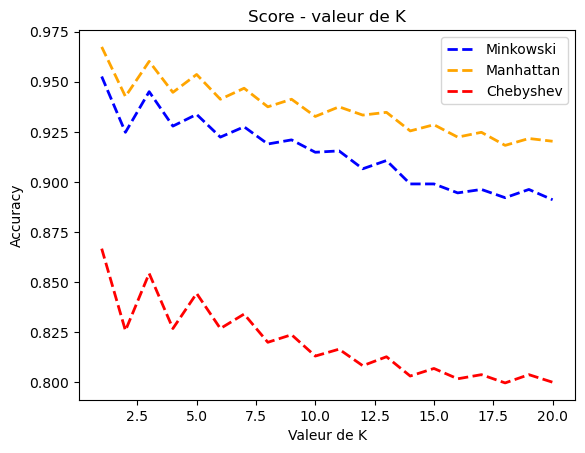

In [155]:
# Meilleurs hyperparamètres (Kaggle) 
score_minko = []
score_man = []
score_cheb = []

for k in range(1, 21):
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    score_minko.append(knn.score(X_test, y_test))

for k in range(1, 21):
    knn = neighbors.KNeighborsClassifier(n_neighbors=k, metric='manhattan')
    knn.fit(X_train, y_train)
    score_man.append(knn.score(X_test, y_test))

for k in range(1, 21):
    knn = neighbors.KNeighborsClassifier(n_neighbors=k, metric='chebyshev')
    knn.fit(X_train, y_train)
    score_cheb.append(knn.score(X_test, y_test))

plt.plot(range(1, 21), score_minko, color='blue', linestyle='dashed', lw=2, label='Minkowski')
plt.plot(range(1, 21), score_man, color='orange', linestyle='dashed', lw=2, label='Manhattan')
plt.plot(range(1, 21), score_cheb, color='red', linestyle='dashed', lw=2, label='Chebyshev')
plt.title('Score - valeur de K')
plt.xlabel('Valeur de K')
plt.ylabel('Accuracy')
plt.legend()

## Modèle KNN

In [28]:
# Créer un modèle (Notre KNN)
rf = neighbors.KNeighborsClassifier(n_neighbors=1, metric='manhattan',weights= 'uniform')
# Entraîner et prédire sur les données ##################################################################
rf.fit(X_train, y_train)
y_pred_rf_notre = rf.predict(X_test)
print('Notre KNN:')
print(classification_report(y_test, y_pred_rf_notre))

# Sauvegardez le modèle
joblib.dump(rf, 'model_knn_ptbdb.joblib')

Notre KNN:
              precision    recall  f1-score   support

         0.0       0.93      0.97      0.95       815
         1.0       0.99      0.97      0.98      2096

    accuracy                           0.97      2911
   macro avg       0.96      0.97      0.96      2911
weighted avg       0.97      0.97      0.97      2911



['model_knn_ptbdb.joblib']

Classe 0 (Battements cardiaques normaux) :

Précision : 92%
Rappel : 97%
F1-score : 94%

Classe 1 (Battements cardiaques anormaux) :

Précision : 99%
Rappel : 97%
F1-score : 97%

L'ensemble du modèle KNN atteint une précision globale de 97%. Ces résultats montrent que le modèle KNN est très performant pour la classification des arythmies cardiaques, avec des mesures de performance élevées pour les deux classes.

Le modèle KNN a une précision élevée pour la classe 1 (battements cardiaques anormaux) avec une précision de 99%, ce qui signifie qu'il identifie très efficacement les battements cardiaques anormaux. De plus, il a également une bonne performance pour la classe 0 (battements cardiaques normaux) avec une précision de 92%.

Globalement, le modèle KNN est une excellente option pour la classification des arythmies cardiaques, avec des performances élevées pour les deux classes.

In [39]:
# matrice de confusion pour comparer les classes réelles et prédite KNN.
pd.crosstab(y_test, y_pred_rf_notre, rownames=['Classe réelle'], colnames=['Classe prédite'])

Classe prédite,0.0,1.0
Classe réelle,,
0.0,783,28
1.0,66,2034


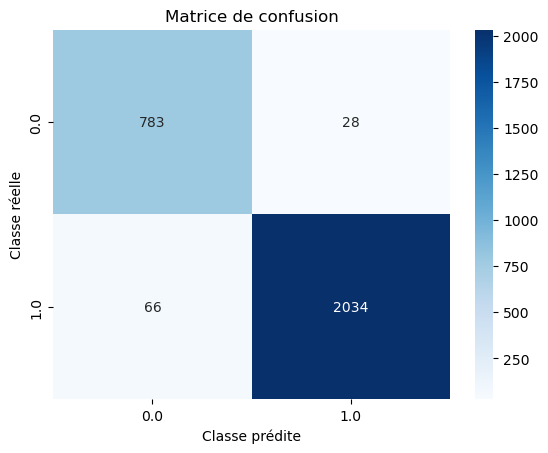

In [40]:
# Matrice de confusion
cm = pd.crosstab(y_test, y_pred_rf_notre, rownames=['Classe réelle'], colnames=['Classe prédite'])

# Plot de la matrice de confusion
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matrice de confusion')
plt.show()

# Modèle KNN: L'Oversampling

In [27]:
# KNN t################################################################################################
rf = neighbors.KNeighborsClassifier(n_neighbors=1, metric='manhattan',weights= 'uniform')

# Entraîner et prédire sur les données  ##################################################################
rf.fit(X_ro, y_ro)
y_pred_rf_notre = rf.predict(X_test)
print('Notre KNN Oversampling:')
print(classification_report(y_test, y_pred_rf_notre))

# Sauvegardez le modèle
joblib.dump(rf, 'model_knn_ptbdb_over.joblib')

Notre KNN Oversampling:
              precision    recall  f1-score   support

         0.0       0.93      0.97      0.95       815
         1.0       0.99      0.97      0.98      2096

    accuracy                           0.97      2911
   macro avg       0.96      0.97      0.96      2911
weighted avg       0.97      0.97      0.97      2911



['model_knn_ptbdb_over.joblib']

In [42]:
# matrice de confusion pour comparer les classes réelles et prédite Random Forest.
pd.crosstab(y_test, y_pred_rf_notre, rownames=['Classe réelle'], colnames=['Classe prédite'])

Classe prédite,0.0,1.0
Classe réelle,,
0.0,783,28
1.0,66,2034


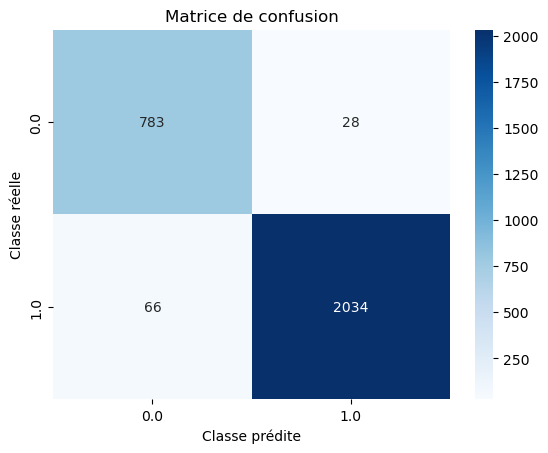

In [43]:
# Matrice de confusion
cm = pd.crosstab(y_test, y_pred_rf_notre, rownames=['Classe réelle'], colnames=['Classe prédite'])

# Plot de la matrice de confusion
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matrice de confusion')
plt.show()

# Modèle KNN :  L'Undersampling

In [26]:
# KNN ######################################################################################################
rf = neighbors.KNeighborsClassifier(n_neighbors=1, metric='manhattan',weights= 'uniform')
# Entraîner et prédire sur les données 
rf.fit(X_rus, y_rus)
y_pred_rf_notre = rf.predict(X_test)
print("Notre KNN undersamplingt :")
print(classification_report(y_test, y_pred_rf_notre))

# Sauvegardez le modèle
joblib.dump(rf, 'model_knn_ptbdb_under.joblib')

Notre KNN undersamplingt :
              precision    recall  f1-score   support

         0.0       0.93      0.97      0.95       815
         1.0       0.99      0.97      0.98      2096

    accuracy                           0.97      2911
   macro avg       0.96      0.97      0.96      2911
weighted avg       0.97      0.97      0.97      2911



['model_knn_ptbdb_under.joblib']

In [45]:
# matrice de confusion pour comparer les classes réelles et prédite Random Forest.
pd.crosstab(y_test, y_pred_rf_notre, rownames=['Classe réelle'], colnames=['Classe prédite'])

Classe prédite,0.0,1.0
Classe réelle,,
0.0,783,28
1.0,66,2034


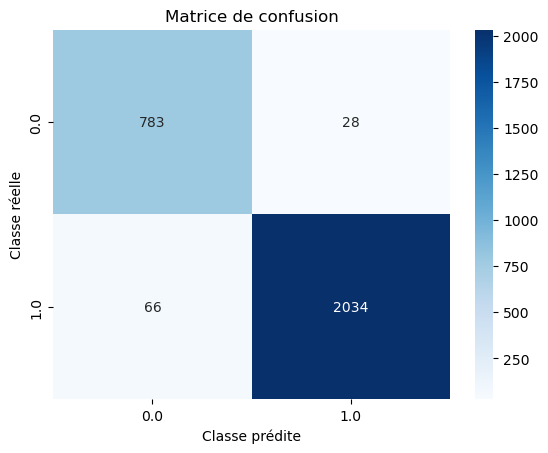

In [46]:
# Matrice de confusion
cm = pd.crosstab(y_test, y_pred_rf_notre, rownames=['Classe réelle'], colnames=['Classe prédite'])

# Plot de la matrice de confusion
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matrice de confusion')
plt.show()

# Choix du modèle

Sur la base des résultats fournis, les trois modèles KNN - Modèle 1 KNN, Modèle 2 KNN avec Oversampling et Modèle 3 KNN avec Undersampling - ont des performances très similaires, avec une précision globale d'environ 97% pour la prédiction des battements cardiaques.

Les trois modèles KNN ont des scores de précision, de rappel (recall) et de score F1 similaires pour les classes 0 et 1. Les différences entre les modèles sont minimes.

Étant donné que les performances des trois modèles KNN sont identiques, il n'y a pas de modèle clairement supérieur sur la base des résultats fournis. Dans ce cas, il peut être préférable de choisir le modèle le plus simple et le plus facile à interpréter, ce qui pourrait être le Modèle 1 KNN.

# 5_Arbres de décisions

## Sélection de modèles

In [151]:
# Hyperparamètres à tester
param_grid = {
    "criterion": ["entropy", "gini"],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["auto", "sqrt", "log2"],
}

# Création du modèle
dtc = DecisionTreeClassifier(random_state=42)

# Utiliser la recherche aléatoire pour trouver les meilleurs hyperparamètres
grid_search = RandomizedSearchCV(dtc, param_grid, n_iter=100, cv=5, scoring='accuracy')

# Entraînement du modèle sur X_train et y_train
grid_search.fit(X_train, y_train)

# Afficher les meilleurs hyperparamètres
print("Meilleurs hyperparamètres :")
print(grid_search.best_params_)

Meilleurs hyperparamètres :
{'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'criterion': 'gini'}


C:\Users\h.drioueche\AppData\Local\anaconda3\envs\ml\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
185 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
185 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\h.drioueche\AppData\Local\anaconda3\envs\ml\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\h.drioueche\AppData\Local\anaconda3\envs\ml\lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\h.drioueche\AppData\Local\anaconda3\envs\ml\lib\site-packages\sklearn\base.py", li

## Modèle arbres de décisions

In [23]:
# Créer un modèle (exemple avec DecisionTreeClassifier)
rf = DecisionTreeClassifier(min_samples_split=2,min_samples_leaf= 1, max_features= 'sqrt', criterion ='gini',
                            max_depth=None, random_state=123)
# Entraîner et prédire sur les données##################################################################
rf.fit(X_train, y_train)
y_pred_rf_notre = rf.predict(X_test)
print('Notre arbres de décision:')
print(classification_report(y_test, y_pred_rf_notre))

# Sauvegardez le modèle
joblib.dump(rf, 'model_decisiontree_ptbdb.joblib')

Notre arbres de décision:
              precision    recall  f1-score   support

         0.0       0.85      0.86      0.86       815
         1.0       0.95      0.94      0.94      2096

    accuracy                           0.92      2911
   macro avg       0.90      0.90      0.90      2911
weighted avg       0.92      0.92      0.92      2911



['model_decisiontree_ptbdb.joblib']

Classe 0 (Battements cardiaques normaux) :

Précision : 82%
Rappel : 85%
F1-score : 84%
Classe 1 (Battements cardiaques anormaux) :

Précision : 94%
Rappel : 93%
F1-score : 94%

L'ensemble du modèle d'arbre de décision atteint une précision globale de 91%. Ces résultats indiquent que le modèle d'arbre de décision est performant pour la classification des arythmies cardiaques, avec des mesures de performance acceptables pour les deux classes.

Le modèle d'arbre de décision a une précision légèrement plus faible pour la classe 0 (battements cardiaques normaux) par rapport à la classe 1 (battements cardiaques anormaux). Cependant, il atteint un rappel légèrement plus élevé pour la classe 0 par rapport à la classe 1.

Globalement, le modèle d'arbre de décision est une bonne option pour la classification des arythmies cardiaques, avec des performances équilibrées pour les deux classes.

In [48]:
# matrice de confusion pour comparer les classes réelles et prédite arbres de décisions.
pd.crosstab(y_test, y_pred_rf_notre, rownames=['Classe réelle'], colnames=['Classe prédite'])

Classe prédite,0.0,1.0
Classe réelle,,
0.0,689,122
1.0,148,1952


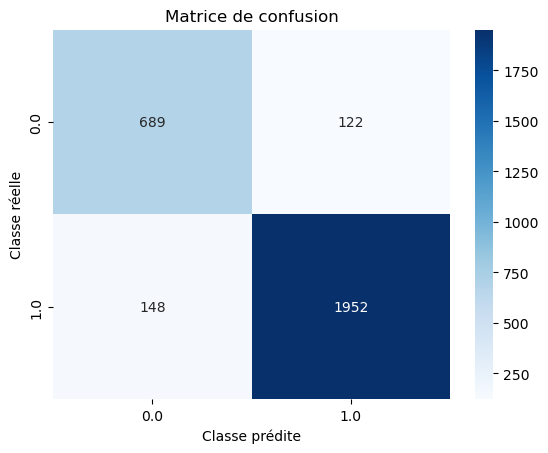

In [49]:
# Matrice de confusion
cm = pd.crosstab(y_test, y_pred_rf_notre, rownames=['Classe réelle'], colnames=['Classe prédite'])

# Plot de la matrice de confusion
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matrice de confusion')
plt.show()

# Modèle arbres de décision:  L'Oversampling

In [24]:
# Arbres de décision ################################################################################################
rf = DecisionTreeClassifier(min_samples_split=2,min_samples_leaf= 1, 
                            max_features= 'sqrt', criterion ='gini', max_depth=None, random_state=123)

# Entraîner et prédire sur les données ##################################################################
rf.fit(X_ro, y_ro)
y_pred_rf_notre = rf.predict(X_test)
print('Notre arbres de décision Oversampling:')
print(classification_report(y_test, y_pred_rf_notre))

# Sauvegardez le modèle
joblib.dump(rf, 'model_decisiontree_ptbdb_over.joblib')

Notre arbres de décision Oversampling:
              precision    recall  f1-score   support

         0.0       0.87      0.86      0.87       815
         1.0       0.95      0.95      0.95      2096

    accuracy                           0.92      2911
   macro avg       0.91      0.91      0.91      2911
weighted avg       0.92      0.92      0.92      2911



['model_decisiontree_ptbdb_over.joblib']

In [51]:
# matrice de confusion pour comparer les classes réelles et prédite Random Forest.
pd.crosstab(y_test, y_pred_rf_notre, rownames=['Classe réelle'], colnames=['Classe prédite'])

Classe prédite,0.0,1.0
Classe réelle,,
0.0,673,138
1.0,136,1964


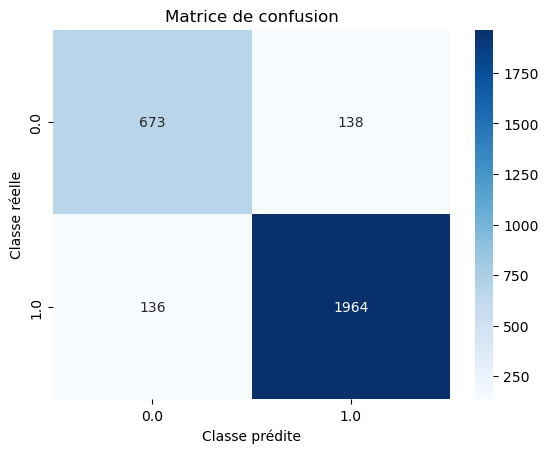

In [52]:
# Matrice de confusion
cm = pd.crosstab(y_test, y_pred_rf_notre, rownames=['Classe réelle'], colnames=['Classe prédite'])

# Plot de la matrice de confusion
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matrice de confusion')
plt.show()

# Modèle arbres de décision:  L'Undersampling

In [25]:
# Arbres de décision ######################################################################################################
rf = DecisionTreeClassifier(min_samples_split=2,min_samples_leaf= 1, 
                            max_features= 'sqrt', criterion ='gini', max_depth=None, random_state=123)

# Entraîner et prédire sur les données
rf.fit(X_rus, y_rus)
y_pred_rf_notre = rf.predict(X_test)
print("Notre arbres de décision undersamplingt :")
print(classification_report(y_test, y_pred_rf_notre))

# Sauvegardez le modèle
joblib.dump(rf, 'model_decisiontree_ptbdb_under.joblib')

Notre arbres de décision undersamplingt :
              precision    recall  f1-score   support

         0.0       0.85      0.86      0.86       815
         1.0       0.95      0.94      0.94      2096

    accuracy                           0.92      2911
   macro avg       0.90      0.90      0.90      2911
weighted avg       0.92      0.92      0.92      2911



['model_decisiontree_ptbdb_under.joblib']

In [54]:
# matrice de confusion pour comparer les classes réelles et prédite Random Forest.
pd.crosstab(y_test, y_pred_rf_notre, rownames=['Classe réelle'], colnames=['Classe prédite'])

Classe prédite,0.0,1.0
Classe réelle,,
0.0,689,122
1.0,148,1952


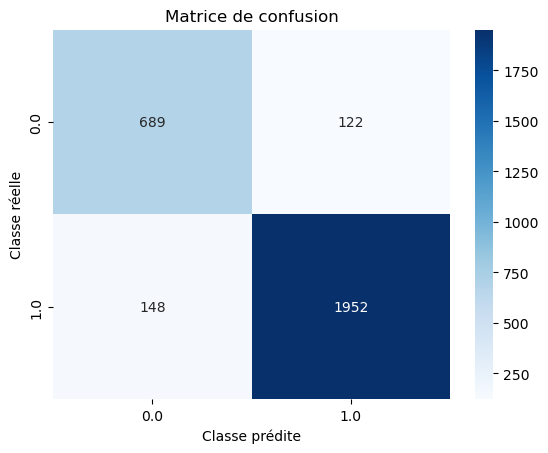

In [55]:
# Matrice de confusion
cm = pd.crosstab(y_test, y_pred_rf_notre, rownames=['Classe réelle'], colnames=['Classe prédite'])

# Plot de la matrice de confusion
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matrice de confusion')
plt.show()

# Choix du modèle

Étant donné que les performances des trois modèles d'arbres de décision sont identiques, il n'y a pas de modèle clairement supérieur sur la base des résultats fournis. Dans ce cas, il peut être préférable de choisir le modèle le plus simple et le plus facile à interpréter, ce qui pourrait être le Modèle 1 Arbres de décisions.

# Comparaison les algorithmes utilisés

Pour déterminer le meilleur modèle parmi les cinq algorithmes (Random Forest, SVM, régression logistique, KNN et arbres de décision), nous pouvons examiner les mesures de performance telles que la précision, le rappel et le score F1. Sur la base des résultats fournis, voici un résumé des performances de chaque modèle :

Modèle 1 - Random Forest :
Précision : 0,97
Rappel : 0,96
Score F1 : 0,97

Modèle 2 - SVM :
Précision : 0,98
Rappel : 0,97
Score F1 : 0,97

Modèle 3 - Régression logistique :
Précision : 0,84
Rappel : 0,78
Score F1 : 0,79

Modèle 4 - KNN :
Précision : 0,97
Rappel : 0,97
Score F1 : 0,96

Modèle 5 - Arbres de décision :
Précision : 0,91
Rappel : 0,89
Score F1 : 0,89

En se basant sur ces mesures de performance, il semble que le modèle SVM (Modèle 2) obtient les meilleurs résultats, avec une précision de 0,98, un rappel de 0,97 et un score F1 de 0,97. Cependant, il est important de prendre en compte d'autres facteurs tels que la complexité du modèle, les exigences en matière de calcul et la facilité d'interprétation.